**Import Libraries**

In [6]:
# https://towardsdatascience.com/visualizing-feature-vectors-embeddings-using-pca-and-t-sne-ef157cea3a42
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import torchvision.datasets as datasets


In [5]:
# https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
root_ds_path = "C:/Users/Damian/Documents/School/Fall 2022 - Grad School/Comp 6721/Project/Repo"
data = datasets.ImageFolder(root=root_ds_path+"/LandscapeClassification/Datasets/SRSI RSI CB256/data")

random = 0

X = []
Y = []
for x,y in data:
        xrs = x.resize((64,64))
        img = np.array(xrs).reshape(64*64*3)
        X.append(img) # eurosat = 64*64*3
        Y.append(y)
    
arrX = np.array(X)
arrY = np.array(Y)

# Randomly select 1000 samples for performance reasons
if (random == 1):
    np.random.seed(100)
    subsample_idc = np.random.choice(arrX.shape[0], 1000, replace=False)
    X = arrX[subsample_idc,:]
    y = arrY[subsample_idc]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


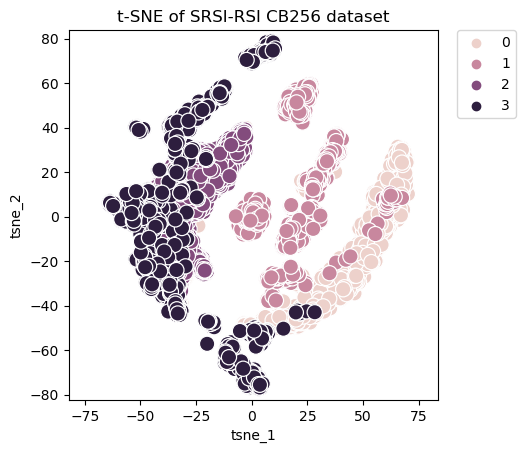

In [7]:
root_tsne_path = "C:/Users/Damian/Documents/School/Fall 2022 - Grad School/Comp 6721/Project/Repo/LandscapeClassification/TSNE work/"
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_title("t-SNE of SRSI-RSI CB256 dataset")
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig(root_tsne_path+"SRSI-RSI CB256 t-SNE")